In [1]:
print("ML Expt 2")
print("Dhwaj Jain S012")

ML Expt 2
Dhwaj Jain S012


Performing a logistic regression analysis on the dataset provided

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("D:/DJS TY Sem V/ML/User_Data.csv")
display(df.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,19,19000,No
1,15810944,M,35,20000,No
2,15668575,F,26,43000,No
3,15603246,F,27,57000,No
4,15804002,M,19,76000,No


In [3]:
df.shape

(400, 5)

In [4]:
display(df.head())
df.info()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,19,19000,No
1,15810944,M,35,20000,No
2,15668575,F,26,43000,No
3,15603246,F,27,57000,No
4,15804002,M,19,76000,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           382 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [5]:
df.describe

<bound method NDFrame.describe of       User ID Gender  Age  EstimatedSalary Purchased
0    15624510    NaN   19            19000        No
1    15810944      M   35            20000        No
2    15668575      F   26            43000        No
3    15603246      F   27            57000        No
4    15804002      M   19            76000        No
..        ...    ...  ...              ...       ...
395  15691863      #   46            41000       Yes
396  15706071      M   51            23000       Yes
397  15654296      #   50            20000       Yes
398  15755018      %   36            33000        No
399  15594041      #   49            36000       Yes

[400 rows x 5 columns]>

In [6]:
df.nunique


<bound method DataFrame.nunique of       User ID Gender  Age  EstimatedSalary Purchased
0    15624510    NaN   19            19000        No
1    15810944      M   35            20000        No
2    15668575      F   26            43000        No
3    15603246      F   27            57000        No
4    15804002      M   19            76000        No
..        ...    ...  ...              ...       ...
395  15691863      #   46            41000       Yes
396  15706071      M   51            23000       Yes
397  15654296      #   50            20000       Yes
398  15755018      %   36            33000        No
399  15594041      #   49            36000       Yes

[400 rows x 5 columns]>

In [7]:
display(df['Gender'].unique())

array([nan, 'M', 'F', '@', '#', '%', '$'], dtype=object)

In [8]:
df['Gender'] = df['Gender'].replace(['@', '#', '%', '$'], pd.NA)

In [9]:
 gender_counts = df['Gender'].value_counts(normalize=True)
df['Gender'] = df['Gender'].apply(lambda x: np.random.choice(gender_counts.index, p=gender_counts.values) if pd.isna(x) else x)
print(df)


      User ID Gender  Age  EstimatedSalary Purchased
0    15624510      F   19            19000        No
1    15810944      M   35            20000        No
2    15668575      F   26            43000        No
3    15603246      F   27            57000        No
4    15804002      M   19            76000        No
..        ...    ...  ...              ...       ...
395  15691863      M   46            41000       Yes
396  15706071      M   51            23000       Yes
397  15654296      M   50            20000       Yes
398  15755018      F   36            33000        No
399  15594041      M   49            36000       Yes

[400 rows x 5 columns]


In [10]:
df['Gender'].value_counts()

Gender
F    210
M    190
Name: count, dtype: int64

In [11]:

df['Age'].unique()


array([19, 35, 26, 27, 32, 25, 20, 18,  0, 47, 45, 46, 48, 49, 29, 31, 21,
       28, 33, 30, 23, 24, 59, 22, 34, 39, 38, 37, 42, 36, 40, 41, 58, 55,
       52, 60, 56, 53, 50, 51, 57, 43, 54, 44], dtype=int64)

In [12]:
median_age = df['Age'][df['Age'] > 0].median()
df['Age'] = df['Age'].replace(0, median_age)
display(df.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,F,19,19000,No
1,15810944,M,35,20000,No
2,15668575,F,26,43000,No
3,15603246,F,27,57000,No
4,15804002,M,19,76000,No


In [13]:
display(df['Gender'].unique())
display(df['Age'].unique())
display('User ID' in df.columns)

array(['F', 'M'], dtype=object)

array([19, 35, 26, 27, 32, 25, 20, 18, 37, 47, 45, 46, 48, 49, 29, 31, 21,
       28, 33, 30, 23, 24, 59, 22, 34, 39, 38, 42, 36, 40, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 43, 54, 44], dtype=int64)

True

In [14]:
purchased_values = df['Purchased'].unique()
print(purchased_values)


['No' 'Yes']


In [15]:
display(df.dtypes)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased          object
dtype: object

In [16]:
df['Purchased'] = df['Purchased'].map({'No':0, 'Yes':1})
df.tail()


,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,M,46,41000,1
396,15706071,M,51,23000,1
397,15654296,M,50,20000,1
398,15755018,F,36,33000,0
399,15594041,M,49,36000,1


In [17]:
display(df['Purchased'].unique())

array([0, 1], dtype=int64)

In [18]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [19]:
df['Gender'].value_counts()

Gender
0    210
1    190
Name: count, dtype: int64

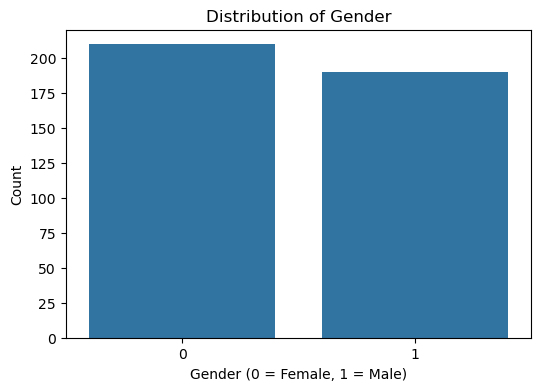

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


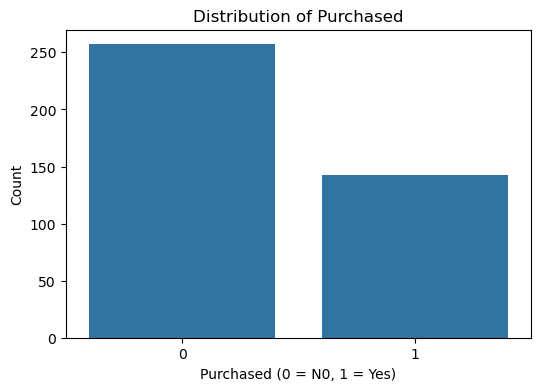

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Purchased', data=df)
plt.title("Distribution of Purchased")
plt.xlabel("Purchased (0 = N0, 1 = Yes)")
plt.ylabel("Count")
plt.show()

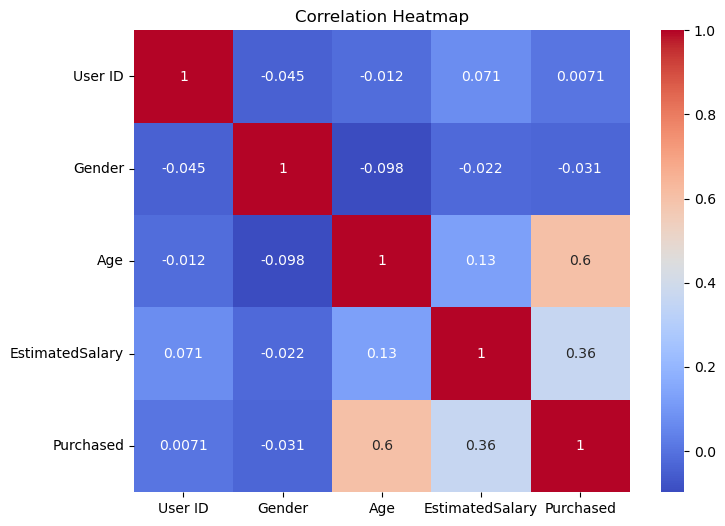

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [23]:
age_mean = df['Age'].mean()
age_std = df['Age'].std()
salary_mean = df['EstimatedSalary'].mean()
salary_std = df['EstimatedSalary'].std()
df['Age'] = (df['Age'] - age_mean) / age_std
df['EstimatedSalary'] = (df['EstimatedSalary'] - salary_mean) / salary_std
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,-1.859592,-1.488183,0
1,15810944,1,-0.277171,-1.458854,0
2,15668575,0,-1.167283,-0.784307,0
3,15603246,0,-1.068382,-0.373714,0
4,15804002,1,-1.859592,0.183521,0


In [25]:
X = df.drop(['Purchased'],axis=1)
Y = df['Purchased']
w = np.zeros((X.shape[1], 1))
b = 0


Functions

In [31]:
# sigmoid function
def sigmoid(z):
    return 1 /(1 + np.exp(-z))



# Cost function
def calc_cost(Y, y_pred):
    m = Y.shape[0]
    cost = - (1/m) * np.sum(Y * np.log(y_pred + 1e-4) + (1 - Y) * np.log(1 -y_pred + 1e-4))
    return cost

# Gradient Descent
def gradient_descent(X, Y, w, b, learning_rate, epochs):
    m = X.shape[0]
    costs = []
    for i in range(epochs):
        # Linear function
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
    # Compute cost
        cost = calc_cost(Y, y_pred)
        # Gradients
        dw = (1/m) * np.dot(X.T, (y_pred - Y))
        db = (1/m) * np.sum(y_pred - Y)
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        print(f"Epoch {i}, Cost: {cost}")
    return w, b, costs


In [32]:
w, b, costs = gradient_descent(X.values, Y.values.reshape(-1, 1), w, b,learning_rate=0.1, epochs=1000)
print("Final weights:\n", w)
print("Final bias:", b)

Epoch 0, Cost: 0.6929472005572793
Epoch 1, Cost: 3.2926324361937716
Epoch 2, Cost: 5.917607940782079
Epoch 3, Cost: 3.2926324361937716
Epoch 4, Cost: 3.2926324361937716
Epoch 5, Cost: 5.917607940782079
Epoch 6, Cost: 3.2926324361937716
Epoch 7, Cost: 5.917607940782079
Epoch 8, Cost: 3.2926324361937716
Epoch 9, Cost: 3.2926324361937716
Epoch 10, Cost: 5.917607940782079
Epoch 11, Cost: 3.2926324361937716
Epoch 12, Cost: 3.2926324361937716
Epoch 13, Cost: 5.917607940782079
Epoch 14, Cost: 3.2926324361937716
Epoch 15, Cost: 3.2926324361937716
Epoch 16, Cost: 5.917607940782079
Epoch 17, Cost: 3.2926324361937716
Epoch 18, Cost: 3.2926324361937716
Epoch 19, Cost: 5.917607940782079
Epoch 20, Cost: 3.2926324361937716
Epoch 21, Cost: 5.917607940782079
Epoch 22, Cost: 3.2926324361937716
Epoch 23, Cost: 3.2926324361937716
Epoch 24, Cost: 5.917607940782079
Epoch 25, Cost: 3.2926324361937716
Epoch 26, Cost: 3.2926324361937716
Epoch 27, Cost: 5.917607940782079
Epoch 28, Cost: 3.2926324361937716
Epoch

C:\Users\dhwaj\AppData\Local\Temp\ipykernel_15744\404333964.py:3: RuntimeWarning: overflow encountered in exp
  return 1 /(1 + np.exp(-z))


In [36]:
from sklearn.preprocessing import StandardScaler

feature_cols = ['Age', 'EstimatedSalary']
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])
display(df.head())

,Gender,Age,EstimatedSalary,Purchased
0,Female,-1.861921,-1.490046,0
1,Male,-0.277518,-1.460681,0
2,Female,-1.168745,-0.785290,0
3,Female,-1.069720,-0.374182,0
4,Male,-1.861921,0.183751,0


In [39]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values.reshape(-1, 1)

learning_rate = 0.01
num_iterations = 1000

learned_w, learned_b, costs = gradient_descent(X, y, w, b, learning_rate, num_iterations)

print("Learned weights (w):", learned_w)
print("Learned bias (b):", learned_b)
print("Number of costs recorded:", len(costs))

Learned weights (w): [[1.24684266]
 [0.68409992]]
Learned bias (b): -0.6231760764137294
Number of costs recorded: 1000


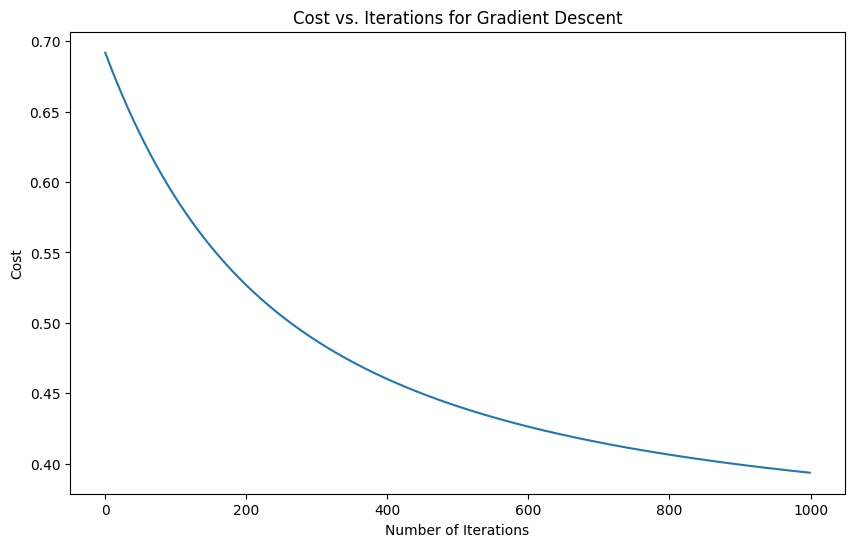

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations for Gradient Descent")
plt.show()

In [35]:
# Prediction function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    y_pred = (y_pred >= 0.5).astype(int)
    return y_pred

# Make predictions on the training data
y_pred_train = predict(X.values, w, b)

# Display the predictions
print("Predictions on training data:\n", y_pred_train.tolist())

Predictions on training data:
 [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]

In [36]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_true)
    return accuracy

Y_reshaped = Y.values.reshape(-1, 1)
accuracy_train = calculate_accuracy(Y_reshaped, y_pred_train)

print(f"Accuracy on training data: {accuracy_train:.4f}")
test_loss = calc_cost(Y_reshaped, y_pred_train)

print(f"Test Loss: {test_loss:.4f}")


Accuracy on training data: 0.3575
Test Loss: 5.9176


In [ ]:
def predict(X, w, b):

  y_hat = sigmoid(np.dot(X, w) + b)
  predictions = (y_hat >= 0.5).astype(int)
  return predictions

predictions = predict(X, learned_w, learned_b)
print("Sample predictions:", predictions[:10].flatten())

Sample predictions: [0 0 0 0 0 0 0 1 0 0]


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X, y.ravel())

print("Scikit-learn Logistic Regression model trained successfully.")

Scikit-learn Logistic Regression model trained successfully.


In [43]:
predictions_sklearn = model.predict(X)
print("First 10 predictions from scikit-learn model:", predictions_sklearn[:10])

First 10 predictions from scikit-learn model: [0 0 0 0 0 0 0 1 0 0]
